<a href="https://colab.research.google.com/github/AyushmanRaha/Customer-Churn-Prediction/blob/main/notebooks/Churn_Prediction_Project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Basic Setup and Exploration**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [3]:
file_path = "https://raw.githubusercontent.com/AyushmanRaha/customer_churn_prediction/refs/heads/main/data/customer_data.csv"
df = pd.read_csv(file_path)

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.shape

(7043, 21)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Data Cleaning and Correction**

In [8]:
# Converting 'TotalCharges' to numeric, coercing empty strings to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.fillna({'TotalCharges':0}, inplace=True)

In [9]:
# Checking whether the DataFrame has any null values anywhere.
has_null = df.isnull().any()
print(f"The DataFrame has null values: {has_null}")

The DataFrame has null values: customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool


# **Functions and Accessory Codes**

**Dictionaries for EDA 1 analysis**

In [10]:
# Dictionary to store no. of people opting/not-opting for paperless billing
paperless_billing_counts = {
    "senior_opt_in_paperless": 0,
    "senior_opt_out_paperless": 0,
    "non_senior_opt_in_paperless": 0,
    "non_senior_opt_out_paperless": 0
}

# Dictionary to store percentage of people opting for each category
paperless_billing_percentage = {
    "senior_Opting_Percent": 0,
    "non_Senior_Opting_Percent": 0
}

# Dictionary to keep track of churning customers
customer_churn_data = {
    "senior": {
        "churning": {
            "paperless": 0,
            "paper": 0
        },
        "not_churning": {
            "paperless": 0,
            "paper": 0
        }
    },
    "non_senior": {
        "churning": {
            "paperless": 0,
            "paper": 0
        },
        "not_churning": {
            "paperless": 0,
            "paper": 0
        }
    }
}

# Dictionary to store the churn percentages by seniority and billing type
churn_percentages = {
    'Senior Citizens: Paperless': 0,
    'Senior Citizens: Paper': 0,
    'Non-Senior Citizens: Paperless': 0,
    'Non-Senior Citizens: Paper': 0
}

# Dictionary to store number of people opting/not-opting for paperless billing by gender
paperless_billing_counts_gender = {
    "male_opt_in_paperless": 0,
    "male_opt_out_paperless": 0,
    "female_opt_in_paperless": 0,
    "female_opt_out_paperless": 0
}

# Dictionary to store percentage of people opting for each billing method by gender
paperless_billing_percentage_gender = {
    "male_Opting_Percent": 0,
    "female_Opting_Percent": 0
}

# Dictionary to keep track of churning customers by gender and billing type
customer_churn_data_gender = {
    "Male": {
        "churning": {
            "paperless": 0,
            "paper": 0
        },
        "not_churning": {
            "paperless": 0,
            "paper": 0
        }
    },
    "Female": {
        "churning": {
            "paperless": 0,
            "paper": 0
        },
        "not_churning": {
            "paperless": 0,
            "paper": 0
        }
    }
}

# Dictionary to store the churn percentages by gender and billing type
churn_percentages_gender = {
    'Male Citizens: Paperless': 0,
    'Male Citizens: Paper': 0,
    'Female Citizens: Paperless': 0,
    'Female Citizens: Paper': 0
}


**Dictionaries for EDA 2 analysis**

In [11]:
# Dictionary to store how many senior/non-senior opted for which type of payment method
methodTypeCounts = {
    "senior": {
        "Electronic_Check": 0,
        "Mailed_Check": 0,
        "Bank_Transfer": 0,
        "Credit_Card": 0
    },
    "non_senior": {
        "Electronic_Check": 0,
        "Mailed_Check": 0,
        "Bank_Transfer": 0,
        "Credit_Card": 0
    }
}

# Dictionary to store how many senior/non-senior opted for which type of payment method and how many churned/not-churned after choosing
methodTypeCountsByChurn = {
    "senior": {
        "Churn": {
            "Electronic_Check": 0,
            "Mailed_Check": 0,
            "Bank_Transfer": 0,
            "Credit_Card": 0
        },
        "Not_Churn": {
            "Electronic_Check": 0,
            "Mailed_Check": 0,
            "Bank_Transfer": 0,
            "Credit_Card": 0
        }
    },
    "non_senior": {
        "Churn": {
            "Electronic_Check": 0,
            "Mailed_Check": 0,
            "Bank_Transfer": 0,
            "Credit_Card": 0
        },
        "Not_Churn": {
            "Electronic_Check": 0,
            "Mailed_Check": 0,
            "Bank_Transfer": 0,
            "Credit_Card": 0
        }
    }
}

# Dictionary to store churn percentages by seniority and payment method
methodTypeChurnPercent = {
    "senior": {
        "Electronic_Check": 0,
        "Mailed_Check": 0,
        "Bank_Transfer": 0,
        "Credit_Card": 0,
    },
    "non_senior": {
        "Electronic_Check": 0,
        "Mailed_Check": 0,
        "Bank_Transfer": 0,
        "Credit_Card": 0,
    }
}

# Dictionary to store how many male/female opted for each type of payment method
methodTypeCountsGender = {
    "Male": {
        "Electronic_Check": 0,
        "Mailed_Check": 0,
        "Bank_Transfer": 0,
        "Credit_Card": 0
    },
    "Female": {
        "Electronic_Check": 0,
        "Mailed_Check": 0,
        "Bank_Transfer": 0,
        "Credit_Card": 0
    }
}

# Dictionary to store how many male/female opted for each payment method and their churn status
methodTypeCountsByChurnGender = {
    "Male": {
        "Churn": {
            "Electronic_Check": 0,
            "Mailed_Check": 0,
            "Bank_Transfer": 0,
            "Credit_Card": 0
        },
        "Not_Churn": {
            "Electronic_Check": 0,
            "Mailed_Check": 0,
            "Bank_Transfer": 0,
            "Credit_Card": 0
        }
    },
    "Female": {
        "Churn": {
            "Electronic_Check": 0,
            "Mailed_Check": 0,
            "Bank_Transfer": 0,
            "Credit_Card": 0
        },
        "Not_Churn": {
            "Electronic_Check": 0,
            "Mailed_Check": 0,
            "Bank_Transfer": 0,
            "Credit_Card": 0
        }
    }
}

# Dictionary to store churn percentages by gender and payment method
methodTypeChurnPercentGender = {
    "Male": {
        "Electronic_Check": 0,
        "Mailed_Check": 0,
        "Bank_Transfer": 0,
        "Credit_Card": 0
    },
    "Female": {
        "Electronic_Check": 0,
        "Mailed_Check": 0,
        "Bank_Transfer": 0,
        "Credit_Card": 0
    }
}

**Functions used for EDA 1 analysis**

In [12]:
def billingCountChurnCount():
  for seniority, paperless, churn in zip(df['SeniorCitizen'], df['PaperlessBilling'], df['Churn']):

    if seniority==1 and paperless=='Yes':
      paperless_billing_counts["senior_opt_in_paperless"]+=1
      if churn=='Yes':
        customer_churn_data["senior"]["churning"]["paperless"]+=1
      else:
        customer_churn_data["senior"]["not_churning"]["paperless"]+=1

    if seniority==1 and paperless=='No':
      paperless_billing_counts["senior_opt_out_paperless"]+=1
      if churn=='Yes':
        customer_churn_data["senior"]["churning"]["paper"]+=1
      else:
        customer_churn_data["senior"]["not_churning"]["paper"]+=1

    if seniority==0 and paperless=='Yes':
      paperless_billing_counts["non_senior_opt_in_paperless"]+=1
      if churn=='Yes':
        customer_churn_data["non_senior"]["churning"]["paperless"]+=1
      else:
        customer_churn_data["non_senior"]["not_churning"]["paperless"]+=1

    if seniority==0 and paperless=='No':
      paperless_billing_counts["non_senior_opt_out_paperless"]+=1
      if churn=='Yes':
        customer_churn_data["non_senior"]["churning"]["paper"]+=1
      else:
        customer_churn_data["non_senior"]["not_churning"]["paper"]+=1

#For genders
def billingCountChurnCountGender():
  for gender, paperless, churn in zip(df['gender'], df['PaperlessBilling'], df['Churn']):

    if gender=="Male" and paperless=='Yes':
      paperless_billing_counts_gender["male_opt_in_paperless"]+=1
      if churn=='Yes':
        customer_churn_data_gender["Male"]["churning"]["paperless"]+=1
      else:
        customer_churn_data_gender["Male"]["not_churning"]["paperless"]+=1

    if gender=="Male" and paperless=='No':
      paperless_billing_counts_gender["male_opt_out_paperless"]+=1
      if churn=='Yes':
        customer_churn_data_gender["Male"]["churning"]["paper"]+=1
      else:
        customer_churn_data_gender["Male"]["not_churning"]["paper"]+=1

    if gender=="Female" and paperless=='Yes':
      paperless_billing_counts_gender["female_opt_in_paperless"]+=1
      if churn=='Yes':
        customer_churn_data_gender["Female"]["churning"]["paperless"]+=1
      else:
        customer_churn_data_gender["Female"]["not_churning"]["paperless"]+=1

    if gender=="Female" and paperless=='No':
      paperless_billing_counts_gender["female_opt_out_paperless"]+=1
      if churn=='Yes':
        customer_churn_data_gender["Female"]["churning"]["paper"]+=1
      else:
        customer_churn_data_gender["Female"]["not_churning"]["paper"]+=1

**Functions used for EDA 2 Analysis**

In [13]:
def countingCategoriesChurn(seniority, payment, churn):
  if seniority==1 and payment=='Electronic check' and churn=='Yes':
    methodTypeCountsByChurn["senior"]["Churn"]["Electronic_Check"]+=1

  if seniority==1 and payment=='Electronic check' and churn=='No':
    methodTypeCountsByChurn["senior"]["Not_Churn"]["Electronic_Check"]+=1

  if seniority==1 and payment=='Mailed check' and churn=='Yes':
    methodTypeCountsByChurn["senior"]["Churn"]["Mailed_Check"]+=1

  if seniority==1 and payment=='Mailed check' and churn=='No':
    methodTypeCountsByChurn["senior"]["Not_Churn"]["Mailed_Check"]+=1

  if seniority==1 and payment=='Bank transfer (automatic)' and churn=='Yes':
    methodTypeCountsByChurn["senior"]["Churn"]["Bank_Transfer"]+=1

  if seniority==1 and payment=='Bank transfer (automatic)' and churn=='No':
    methodTypeCountsByChurn["senior"]["Not_Churn"]["Bank_Transfer"]+=1

  if seniority==1 and payment=='Credit card (automatic)' and churn=='Yes':
    methodTypeCountsByChurn["senior"]["Churn"]["Credit_Card"]+=1

  if seniority==1 and payment=='Credit card (automatic)' and churn=='No':
    methodTypeCountsByChurn["senior"]["Not_Churn"]["Credit_Card"]+=1

  if seniority==0 and payment=='Electronic check' and churn=='Yes':
    methodTypeCountsByChurn["non_senior"]["Churn"]["Electronic_Check"]+=1

  if seniority==0 and payment=='Electronic check' and churn=='No':
    methodTypeCountsByChurn["non_senior"]["Not_Churn"]["Electronic_Check"]+=1

  if seniority==0 and payment=='Mailed check' and churn=='Yes':
    methodTypeCountsByChurn["non_senior"]["Churn"]["Mailed_Check"]+=1

  if seniority==0 and payment=='Mailed check' and churn=='No':
    methodTypeCountsByChurn["non_senior"]["Not_Churn"]["Mailed_Check"]+=1

  if seniority==0 and payment=='Bank transfer (automatic)' and churn=='Yes':
    methodTypeCountsByChurn["non_senior"]["Churn"]["Bank_Transfer"]+=1

  if seniority==0 and payment=='Bank transfer (automatic)' and churn=='No':
    methodTypeCountsByChurn["non_senior"]["Not_Churn"]["Bank_Transfer"]+=1

  if seniority==0 and payment=='Credit card (automatic)' and churn=='Yes':
    methodTypeCountsByChurn["non_senior"]["Churn"]["Credit_Card"]+=1

  if seniority==0 and payment=='Credit card (automatic)' and churn=='No':
    methodTypeCountsByChurn["non_senior"]["Not_Churn"]["Credit_Card"]+=1

def countingCategories(seniority, payment):
  if seniority==1 and payment=='Electronic check':
    methodTypeCounts["senior"]["Electronic_Check"]+=1

  if seniority==1 and payment=='Mailed check':
    methodTypeCounts["senior"]["Mailed_Check"]+=1

  if seniority==1 and payment=='Bank transfer (automatic)':
    methodTypeCounts["senior"]["Bank_Transfer"]+=1

  if seniority==1 and payment=='Credit card (automatic)':
    methodTypeCounts["senior"]["Credit_Card"]+=1

  if seniority==0 and payment=='Electronic check':
    methodTypeCounts["non_senior"]["Electronic_Check"]+=1

  if seniority==0 and payment=='Mailed check':
    methodTypeCounts["non_senior"]["Mailed_Check"]+=1

  if seniority==0 and payment=='Bank transfer (automatic)':
    methodTypeCounts["non_senior"]["Bank_Transfer"]+=1

  if seniority==0 and payment=='Credit card (automatic)':
    methodTypeCounts["non_senior"]["Credit_Card"]+=1

#For genders
def countingCategoriesChurnGender(gender, payment, churn):
  if gender=="Male" and payment=='Electronic check' and churn=='Yes':
    methodTypeCountsByChurnGender["Male"]["Churn"]["Electronic_Check"]+=1

  if gender=="Male" and payment=='Electronic check' and churn=='No':
    methodTypeCountsByChurnGender["Male"]["Not_Churn"]["Electronic_Check"]+=1

  if gender=="Male" and payment=='Mailed check' and churn=='Yes':
    methodTypeCountsByChurnGender["Male"]["Churn"]["Mailed_Check"]+=1

  if gender=="Male" and payment=='Mailed check' and churn=='No':
    methodTypeCountsByChurnGender["Male"]["Not_Churn"]["Mailed_Check"]+=1

  if gender=="Male" and payment=='Bank transfer (automatic)' and churn=='Yes':
    methodTypeCountsByChurnGender["Male"]["Churn"]["Bank_Transfer"]+=1

  if gender=="Male" and payment=='Bank transfer (automatic)' and churn=='No':
    methodTypeCountsByChurnGender["Male"]["Not_Churn"]["Bank_Transfer"]+=1

  if gender=="Male" and payment=='Credit card (automatic)' and churn=='Yes':
    methodTypeCountsByChurnGender["Male"]["Churn"]["Credit_Card"]+=1

  if gender=="Male" and payment=='Credit card (automatic)' and churn=='No':
    methodTypeCountsByChurnGender["Male"]["Not_Churn"]["Credit_Card"]+=1

  if gender=="Female" and payment=='Electronic check' and churn=='Yes':
    methodTypeCountsByChurnGender["Female"]["Churn"]["Electronic_Check"]+=1

  if gender=="Female" and payment=='Electronic check' and churn=='No':
    methodTypeCountsByChurnGender["Female"]["Not_Churn"]["Electronic_Check"]+=1

  if gender=="Female" and payment=='Mailed check' and churn=='Yes':
    methodTypeCountsByChurnGender["Female"]["Churn"]["Mailed_Check"]+=1

  if gender=="Female" and payment=='Mailed check' and churn=='No':
    methodTypeCountsByChurnGender["Female"]["Not_Churn"]["Mailed_Check"]+=1

  if gender=="Female" and payment=='Bank transfer (automatic)' and churn=='Yes':
    methodTypeCountsByChurnGender["Female"]["Churn"]["Bank_Transfer"]+=1

  if gender=="Female" and payment=='Bank transfer (automatic)' and churn=='No':
    methodTypeCountsByChurnGender["Female"]["Not_Churn"]["Bank_Transfer"]+=1

  if gender=="Female" and payment=='Credit card (automatic)' and churn=='Yes':
    methodTypeCountsByChurnGender["Female"]["Churn"]["Credit_Card"]+=1

  if gender=="Female" and payment=='Credit card (automatic)' and churn=='No':
    methodTypeCountsByChurnGender["Female"]["Not_Churn"]["Credit_Card"]+=1

def countingCategoriesGender(gender, payment):
  if gender=="Male" and payment=='Electronic check':
    methodTypeCountsGender["Male"]["Electronic_Check"]+=1

  if gender=="Male" and payment=='Mailed check':
    methodTypeCountsGender["Male"]["Mailed_Check"]+=1

  if gender=="Male" and payment=='Bank transfer (automatic)':
    methodTypeCountsGender["Male"]["Bank_Transfer"]+=1

  if gender=="Male" and payment=='Credit card (automatic)':
    methodTypeCountsGender["Male"]["Credit_Card"]+=1

  if gender=="Female" and payment=='Electronic check':
    methodTypeCountsGender["Female"]["Electronic_Check"]+=1

  if gender=="Female" and payment=='Mailed check':
    methodTypeCountsGender["Female"]["Mailed_Check"]+=1

  if gender=="Female" and payment=='Bank transfer (automatic)':
    methodTypeCountsGender["Female"]["Bank_Transfer"]+=1

  if gender=="Female" and payment=='Credit card (automatic)':
    methodTypeCountsGender["Female"]["Credit_Card"]+=1

# **Exploratory Data Analysis**

In [14]:
# Iterating through each column of the DataFrame
for column in df.columns:
    print(f"Value Counts for '{column}':\n")

    print(df[column].value_counts(normalize=True)*100)
    print("-" * (len(column) + 24))
    print(" ")
    print(" ")

Value Counts for 'customerID':

customerID
3186-AJIEK    0.014198
7590-VHVEG    0.014198
5575-GNVDE    0.014198
8775-CEBBJ    0.014198
2823-LKABH    0.014198
                ...   
6713-OKOMC    0.014198
1452-KIOVK    0.014198
9305-CDSKC    0.014198
9237-HQITU    0.014198
7795-CFOCW    0.014198
Name: proportion, Length: 7043, dtype: float64
----------------------------------
 
 
Value Counts for 'gender':

gender
Male      50.47565
Female    49.52435
Name: proportion, dtype: float64
------------------------------
 
 
Value Counts for 'SeniorCitizen':

SeniorCitizen
0    83.785319
1    16.214681
Name: proportion, dtype: float64
-------------------------------------
 
 
Value Counts for 'Partner':

Partner
No     51.69672
Yes    48.30328
Name: proportion, dtype: float64
-------------------------------
 
 
Value Counts for 'Dependents':

Dependents
No     70.041176
Yes    29.958824
Name: proportion, dtype: float64
----------------------------------
 
 
Value Counts for 'tenure':

tenure
1

EDA-1: To check the relationship between senior citizens with paperless billing, to see whether there is a bias of senior citizens opting for paperless billing. We also want to check how payment billing relates to churn.

Total number of citizens: 7043
 
Number of people opting paper/paperless billing by seniority:
---------------------------------------------------
Senior Citizens: Paperless billing: 876
 
Senior Citizens: Paper billing: 266
 
Non-Senior Citizens: Paperless billing: 3295
 
Non-Senior Citizens: Paper billing: 2606
 
 
Number of people opting paper/paperless billing by gender:
---------------------------------------------------
Male Citizens: Paperless billing: 2085
 
Male Citizens: Paper billing: 1470
 
Female Citizens: Paperless billing: 2086
 
Female Citizens: Paper billing: 1402
 
Percentage of senior citizens opting for paperless billing: 76.71 %
Percentage of non senior citizens opting for paperless billing: 55.84 %
 
Percentage of male citizens opting for paperless billing: 58.65 %
Percentage of female citizens opting for paperless billing: 59.81 %
 
 
Seniority: Senior
---------------------------------------------
 
   Churn Status: Churning
       Billing Method: Paperless, Coun

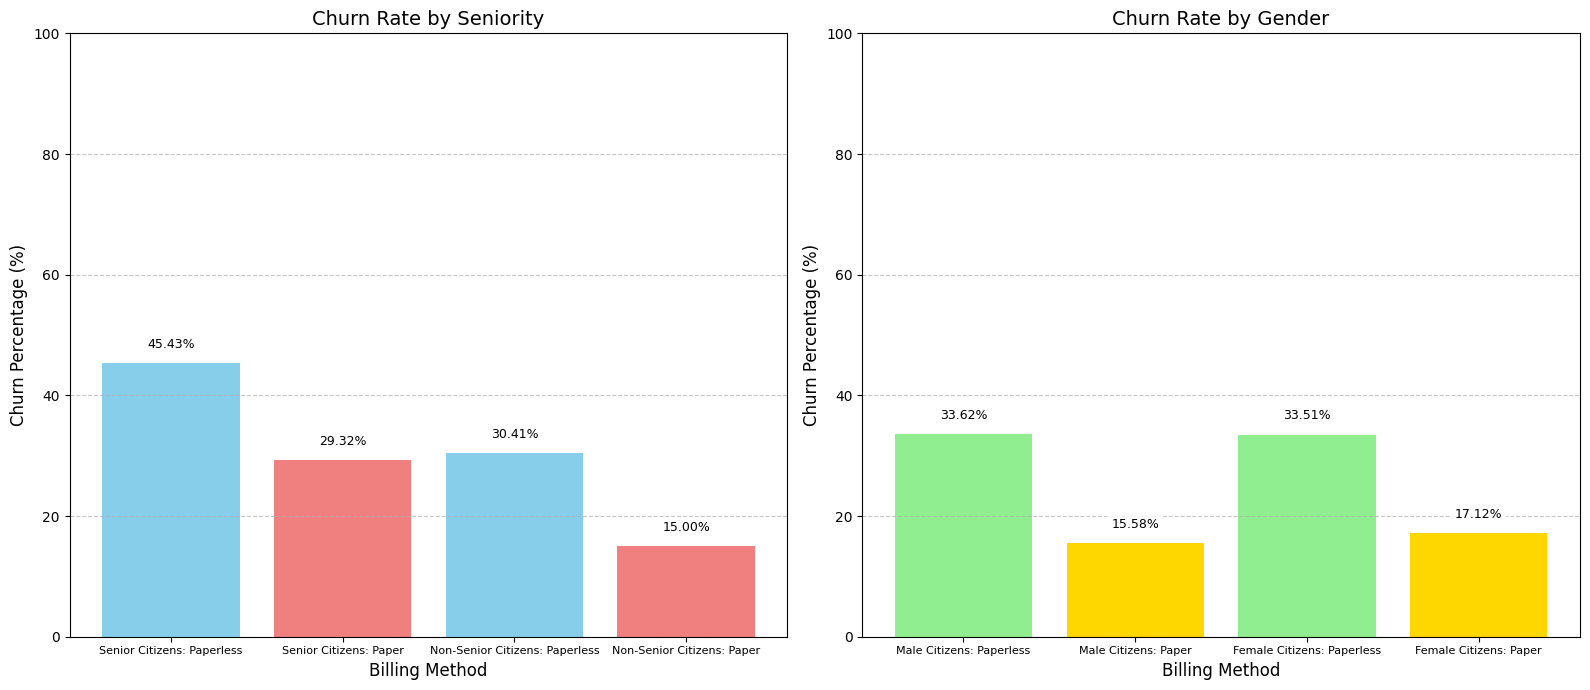

In [15]:
# Function called to calculate the above mentioned dictionaries
billingCountChurnCount()

print(f"Total number of citizens: {sum(paperless_billing_counts.values())}")
print(" ")
print("Number of people opting paper/paperless billing by seniority:")
print("-" * (len(df.columns) + 30))
print(f"Senior Citizens: Paperless billing: {paperless_billing_counts['senior_opt_in_paperless']}")
print(" ")
print(f"Senior Citizens: Paper billing: {paperless_billing_counts['senior_opt_out_paperless']}")
print(" ")
print(f"Non-Senior Citizens: Paperless billing: {paperless_billing_counts['non_senior_opt_in_paperless']}")
print(" ")
print(f"Non-Senior Citizens: Paper billing: {paperless_billing_counts['non_senior_opt_out_paperless']}")
print(" ")
#For genders
billingCountChurnCountGender()

print(" ")
print("Number of people opting paper/paperless billing by gender:")
print("-" * (len(df.columns) + 30))
print(f"Male Citizens: Paperless billing: {paperless_billing_counts_gender['male_opt_in_paperless']}")
print(" ")
print(f"Male Citizens: Paper billing: {paperless_billing_counts_gender['male_opt_out_paperless']}")
print(" ")
print(f"Female Citizens: Paperless billing: {paperless_billing_counts_gender['female_opt_in_paperless']}")
print(" ")
print(f"Female Citizens: Paper billing: {paperless_billing_counts_gender['female_opt_out_paperless']}")
print(" ")

def calculate_opt_in_percentage(opt_in_count, opt_out_count):
    total = opt_in_count + opt_out_count
    if total == 0:
        return 0
    return (opt_in_count / total) * 100

# Calculating the percentage of people opting for paper/paperless billing type
paperless_billing_percentage["senior_Opting_Percent"] = calculate_opt_in_percentage(
    paperless_billing_counts["senior_opt_in_paperless"],
    paperless_billing_counts["senior_opt_out_paperless"]
)

paperless_billing_percentage["non_Senior_Opting_Percent"] = calculate_opt_in_percentage(
    paperless_billing_counts["non_senior_opt_in_paperless"],
    paperless_billing_counts["non_senior_opt_out_paperless"]
)

paperless_billing_percentage_gender["male_Opting_Percent"] = calculate_opt_in_percentage(
    paperless_billing_counts_gender["male_opt_in_paperless"],
    paperless_billing_counts_gender["male_opt_out_paperless"]
)

paperless_billing_percentage_gender["female_Opting_Percent"] = calculate_opt_in_percentage(
    paperless_billing_counts_gender["female_opt_in_paperless"],
    paperless_billing_counts_gender["female_opt_out_paperless"]
)

print(f"Percentage of senior citizens opting for paperless billing: {round(paperless_billing_percentage['senior_Opting_Percent'],2)} %")
print(f"Percentage of non senior citizens opting for paperless billing: {round(paperless_billing_percentage['non_Senior_Opting_Percent'],2)} %")
print(" ")
print(f"Percentage of male citizens opting for paperless billing: {round(paperless_billing_percentage_gender['male_Opting_Percent'],2)} %")
print(f"Percentage of female citizens opting for paperless billing: {round(paperless_billing_percentage_gender['female_Opting_Percent'],2)} %")
print(" ")

# Printing the churn data by seniority and billing type
for seniority, churn in customer_churn_data.items():
  print(" ")
  print(f"Seniority: {seniority.replace('_', ' ').title()}")
  print("-" * (len(df.columns) + 24))
  for churn_status, billing_data in churn.items():
    print(" ")
    print(f"   Churn Status: {churn_status.replace('_', ' ').title()}")
    for billing_method, count in billing_data.items():
      print(f"       Billing Method: {billing_method.replace('_', ' ').title()}, Count: {count}")

print(" ")
print(" ")

# Printing the churn data by gender and billing type

for gender, churn in customer_churn_data_gender.items():
  print(" ")
  print(f"Gender: {gender.replace('_', ' ').title()}")
  print("-" * (len(df.columns) + 24))
  for churn_status, billing_data in churn.items():
    print(" ")
    print(f"   Churn Status: {churn_status.replace('_', ' ').title()}")
    for billing_method, count in billing_data.items():
      print(f"       Billing Method: {billing_method.replace('_', ' ').title()}, Count: {count}")

print(" ")
print(" ")

# Calculating the churn percentages by both seniority and gender wise
churn_percentages["Senior Citizens: Paperless"] = round(customer_churn_data['senior']["churning"]["paperless"] / (
    customer_churn_data['senior']["churning"]["paperless"] +
    customer_churn_data['senior']["not_churning"]["paperless"]
)*100,2)

churn_percentages["Senior Citizens: Paper"] = round(customer_churn_data['senior']["churning"]["paper"] / (
    customer_churn_data['senior']["churning"]["paper"] +
    customer_churn_data['senior']["not_churning"]["paper"]
)*100,2)

churn_percentages["Non-Senior Citizens: Paperless"] = round(customer_churn_data['non_senior']["churning"]["paperless"] / (
    customer_churn_data['non_senior']["churning"]["paperless"] +
    customer_churn_data['non_senior']["not_churning"]["paperless"]
)*100,2)

churn_percentages["Non-Senior Citizens: Paper"] = round(customer_churn_data['non_senior']["churning"]["paper"] / (
    customer_churn_data['non_senior']["churning"]["paper"] +
    customer_churn_data['non_senior']["not_churning"]["paper"]
)*100,2)

churn_percentages_gender["Male Citizens: Paperless"] = round(customer_churn_data_gender['Male']["churning"]["paperless"] / (
    customer_churn_data_gender['Male']["churning"]["paperless"] +
    customer_churn_data_gender['Male']["not_churning"]["paperless"]
)*100,2)

churn_percentages_gender["Male Citizens: Paper"] = round(customer_churn_data_gender['Male']["churning"]["paper"] / (
    customer_churn_data_gender['Male']["churning"]["paper"] +
    customer_churn_data_gender['Male']["not_churning"]["paper"]
)*100,2)

churn_percentages_gender["Female Citizens: Paperless"] = round(customer_churn_data_gender['Female']["churning"]["paperless"] / (
    customer_churn_data_gender['Female']["churning"]["paperless"] +
    customer_churn_data_gender['Female']["not_churning"]["paperless"]
)*100,2)

churn_percentages_gender["Female Citizens: Paper"] = round(customer_churn_data_gender['Female']["churning"]["paper"] / (
    customer_churn_data_gender['Female']["churning"]["paper"] +
    customer_churn_data_gender['Female']["not_churning"]["paper"]
)*100,2)

# Printing the percentage of churning by seniority and billing type
print("Percentage of churning by seniority and billing type: ")
print("-" * (len(df.columns) + 24))
for category, count in churn_percentages.items():
  print(f"{category} billing - {count} %")
  print(" ")

print("Percentage of churning by gender and billing type: ")
print("-" * (len(df.columns) + 24))
for category, count in churn_percentages_gender.items():
  print(f"{category} billing - {count} %")
  print(" ")

#Now we will visualize the above data.
methodTypeList1 = list(churn_percentages.keys())
ChurnPercentagePerMethodList1 = list(churn_percentages.values())

methodTypeList2 = list(churn_percentages_gender.keys())
ChurnPercentagePerMethodList2 = list(churn_percentages_gender.values())

for i in range(len(methodTypeList1)):
  methodTypeList1[i] = methodTypeList1[i].replace('_', ' ').title()

for i in range(len(methodTypeList2)):
  methodTypeList2[i] = methodTypeList2[i].replace('_', ' ').title()

def add_labels(ax, methodTypeList, ChurnPercentagePerMethodList):
    for i in range(len(methodTypeList)):
        ax.text(i, ChurnPercentagePerMethodList[i] + 2,
                f'{ChurnPercentagePerMethodList[i]:.2f}%',
                ha="center", va="bottom", fontsize=9,
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.3'))

colors1 = ['skyblue', 'lightcoral'] # Colors for non-senior bars
colors2 = ['lightgreen', 'gold']   # Colors for senior bars

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

ax1.bar(methodTypeList1, ChurnPercentagePerMethodList1, color=colors1)
add_labels(ax1, methodTypeList1, ChurnPercentagePerMethodList1)

ax1.set_xlabel('Billing Method', fontsize=12)
ax1.set_ylabel('Churn Percentage (%)', fontsize=12)
ax1.set_title('Churn Rate by Seniority', fontsize=14)
ax1.set_ylim(0, 100)
ax1.set_xticks(range(len(methodTypeList1)))
ax1.set_xticklabels(methodTypeList1, rotation=0, ha='center', fontsize=8)

ax1.grid(axis='y', linestyle='--', alpha=0.7)

ax2.bar(methodTypeList2, ChurnPercentagePerMethodList2, color=colors2)
add_labels(ax2, methodTypeList2, ChurnPercentagePerMethodList2)

ax2.set_xlabel('Billing Method', fontsize=12)
ax2.set_ylabel('Churn Percentage (%)', fontsize=12)
ax2.set_title('Churn Rate by Gender', fontsize=14)
ax2.set_ylim(0, 100)
ax2.set_xticks(range(len(methodTypeList2)))
ax2.set_xticklabels(methodTypeList2, rotation=0, ha='center', fontsize=8)

ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

EDA-2: To find any relationship between senior/non-senior citizens and payment billing. Also how they correlate with churning rate.

Seniority Level: Senior
---------------------------------------------
  Payment Method: Electronic Check, Count: 594
 
  Payment Method: Mailed Check, Count: 94
 
  Payment Method: Bank Transfer, Count: 233
 
  Payment Method: Credit Card, Count: 221
 
Seniority Level: Non Senior
---------------------------------------------
  Payment Method: Electronic Check, Count: 1771
 
  Payment Method: Mailed Check, Count: 1518
 
  Payment Method: Bank Transfer, Count: 1311
 
  Payment Method: Credit Card, Count: 1301
 
 
Gender: Male
---------------------------------------------
  Payment Method: Electronic Check, Count: 1195
 
  Payment Method: Mailed Check, Count: 834
 
  Payment Method: Bank Transfer, Count: 756
 
  Payment Method: Credit Card, Count: 770
 
Gender: Female
---------------------------------------------
  Payment Method: Electronic Check, Count: 1170
 
  Payment Method: Mailed Check, Count: 778
 
  Payment Method: Bank Transfer, Count: 788
 
  Payment Method: Credit Card, Count:

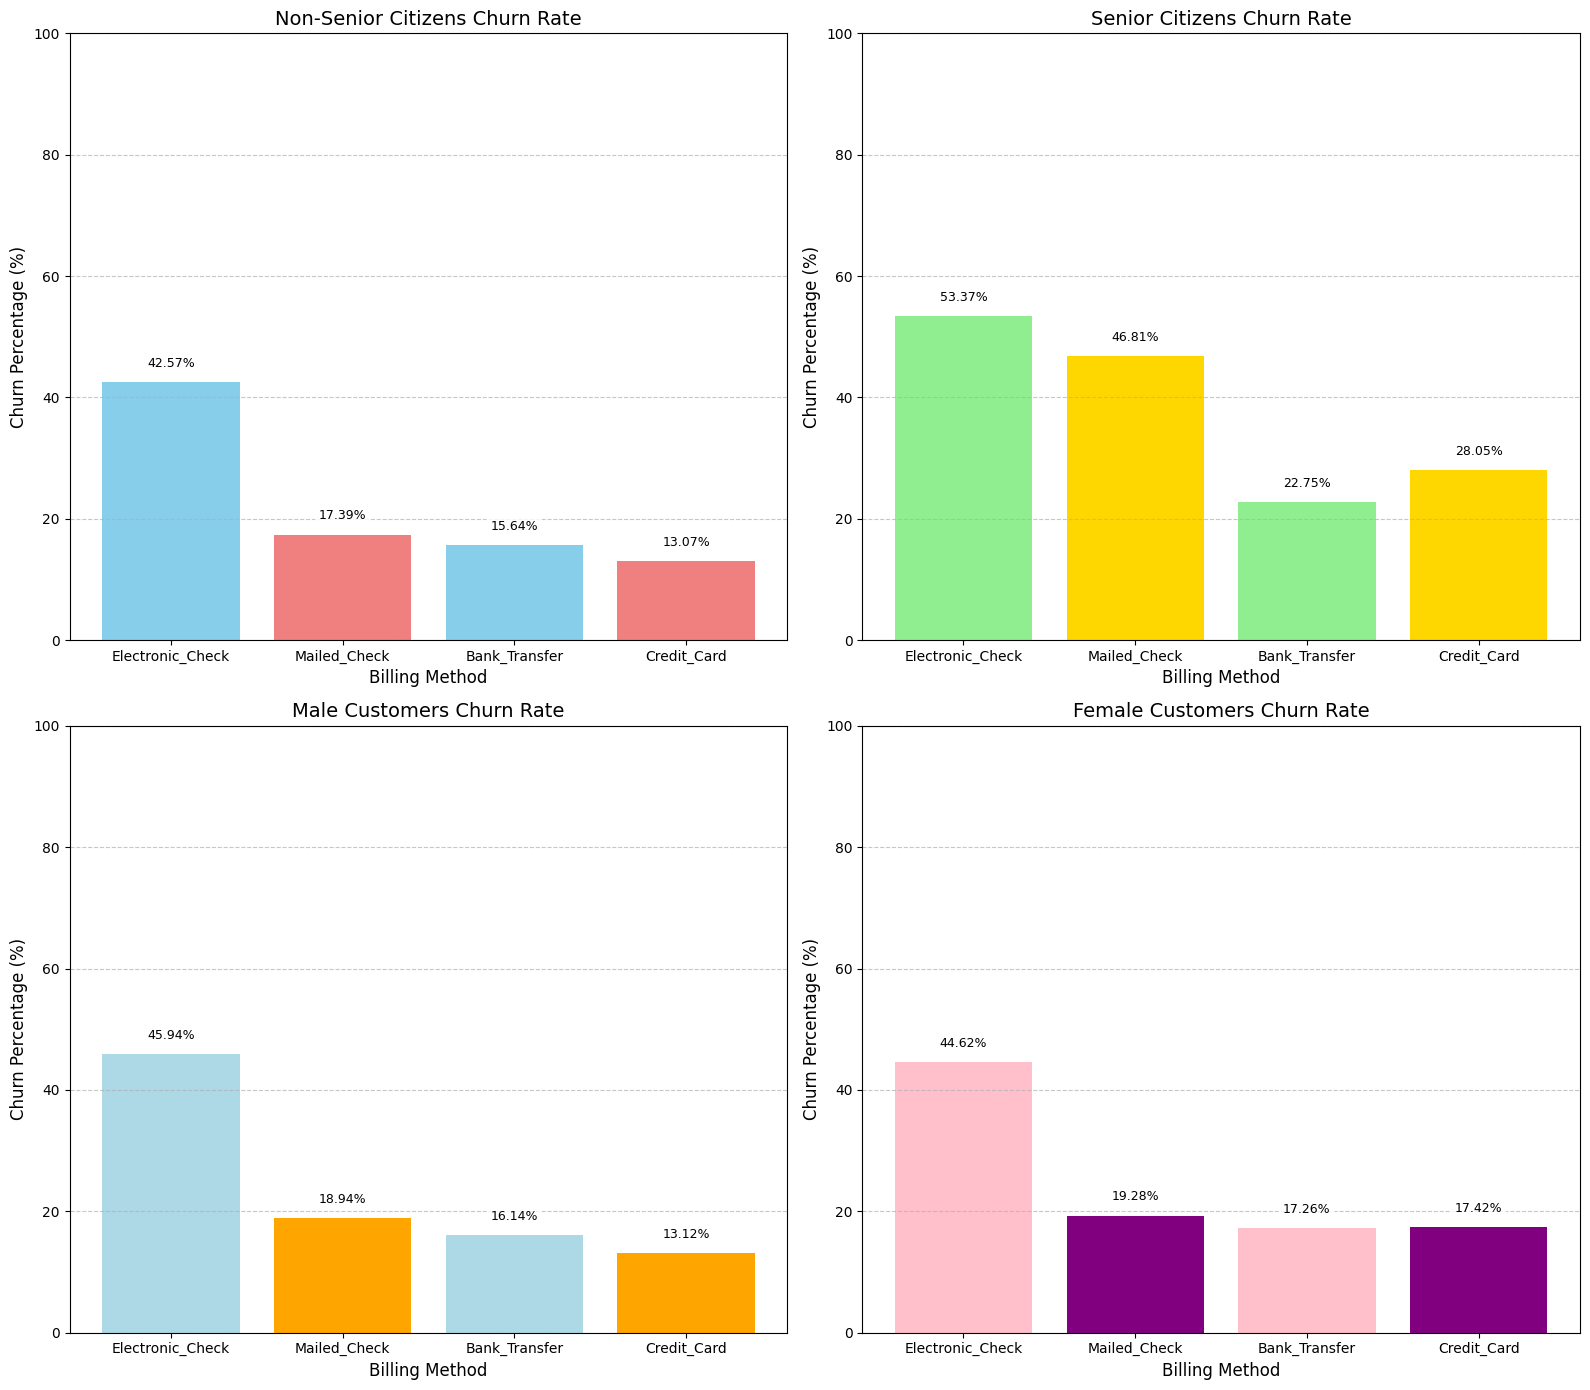

In [16]:
# Calculating the counts for each seniority and payment method
for seniority, payment, churn in zip(df['SeniorCitizen'], df['PaymentMethod'], df['Churn']):
  countingCategoriesChurn(seniority, payment, churn)
  countingCategories(seniority, payment)

# Calculating the counts for each gender and payment method
for gender, payment, churn in zip(df['gender'], df['PaymentMethod'], df['Churn']):
  countingCategoriesChurnGender(gender, payment, churn)
  countingCategoriesGender(gender, payment)

# Printing no. of counts for each seniority and payment method
for seniority_level, payment_types in methodTypeCounts.items():
    print(f"Seniority Level: {seniority_level.replace('_', ' ').title()}")
    print("-" * (len(df.columns) + 24))
    for payment_method, count in payment_types.items():
        print(f"  Payment Method: {payment_method.replace('_', ' ').title()}, Count: {count}")
        print(" ")

print(" ")

# Printing no. of counts for each gender and payment method
for gender, payment_types in methodTypeCountsGender.items():
    print(f"Gender: {gender.replace('_', ' ').title()}")
    print("-" * (len(df.columns) + 24))
    for payment_method, count in payment_types.items():
        print(f"  Payment Method: {payment_method.replace('_', ' ').title()}, Count: {count}")
        print(" ")

print(" ")

# Printing no. of counts by seniority, churn and payment method
for senior_status, churn_data in methodTypeCountsByChurn.items():
    print(" ")
    print(f"Seniority Level: {senior_status.replace('_', ' ').title()}:")
    print("-" * (len(df.columns) + 24))
    for churn_status, method_data in churn_data.items():
        print(f"  {churn_status.replace('_', ' ').title()}:")
        for method, count in method_data.items():
            print(f"     Payment Method: {method.replace('_', ' ').title()}: {count}")
            print(" ")

# Printing no. of counts by gender, churn and payment method
for gender_status, churn_data in methodTypeCountsByChurnGender.items():
    print(" ")
    print(f"Gender: {gender_status.replace('_', ' ').title()}:")
    print("-" * (len(df.columns) + 24))
    for churn_status, method_data in churn_data.items():
        print(f"  {churn_status.replace('_', ' ').title()}:")
        for method, count in method_data.items():
            print(f"     Payment Method: {method.replace('_', ' ').title()}: {count}")
            print(" ")

#Calculating the percentage of churn by seniority and payment method
for seniority_level, payment_types in methodTypeChurnPercent.items():
    for payment_method, count in payment_types.items():
        methodTypeChurnPercent[seniority_level][payment_method] = round((
              methodTypeCountsByChurn[seniority_level]["Churn"][payment_method] /
              (
                methodTypeCountsByChurn[seniority_level]["Churn"][payment_method] +
                methodTypeCountsByChurn[seniority_level]["Not_Churn"][payment_method]
              )
            ) * 100,2)

for seniority_level, payment_types in methodTypeChurnPercent.items():
    print(f"Seniority Level: {seniority_level.replace('_', ' ').title()}")
    print("-" * (len(df.columns) + 24))
    for payment_method, churn_percentage in payment_types.items():
        print(f"  Payment Method: {payment_method.replace('_', ' ').title()}, Churn Percentage: {churn_percentage}%")
        print(" ")

#Calculating the percentage of churn by gender and payment method
for gender, payment_types in methodTypeChurnPercentGender.items():
    for payment_method, count in payment_types.items():
        methodTypeChurnPercentGender[gender][payment_method] = round((
              methodTypeCountsByChurnGender[gender]["Churn"][payment_method] /
              (
                methodTypeCountsByChurnGender[gender]["Churn"][payment_method] +
                methodTypeCountsByChurnGender[gender]["Not_Churn"][payment_method]
              )
            ) * 100,2)

for gender, payment_types in methodTypeChurnPercentGender.items():
    print(f"Gender: {gender.replace('_', ' ').title()}")
    print("-" * (len(df.columns) + 24))
    for payment_method, churn_percentage in payment_types.items():
        print(f"  Payment Method: {payment_method.replace('_', ' ').title()}, Churn Percentage: {churn_percentage}%")
        print(" ")

# Visualising the above data using Matplotlib Bar graph
methodTypeList1 = list(methodTypeCounts['non_senior'].keys())
ChurnPercentagePerMethodList1 = list(methodTypeChurnPercent['non_senior'].values())

methodTypeList2 = list(methodTypeCounts['senior'].keys())
ChurnPercentagePerMethodList2 = list(methodTypeChurnPercent['senior'].values())

methodTypeList3 = list(methodTypeCountsGender['Male'].keys())
ChurnPercentagePerMethodList3 = list(methodTypeChurnPercentGender['Male'].values())

methodTypeList4 = list(methodTypeCountsGender['Female'].keys())
ChurnPercentagePerMethodList4 = list(methodTypeChurnPercentGender['Female'].values())

fig, axes = plt.subplots(2, 2, figsize=(16, 14))
(ax1, ax2), (ax3, ax4) = axes

# Non-Senior
ax1.bar(methodTypeList1, ChurnPercentagePerMethodList1, color=colors1)
add_labels(ax1, methodTypeList1, ChurnPercentagePerMethodList1)
ax1.set_xlabel('Billing Method', fontsize=12)
ax1.set_ylabel('Churn Percentage (%)', fontsize=12)
ax1.set_title('Non-Senior Citizens Churn Rate', fontsize=14)
ax1.set_ylim(0, 100)
ax1.set_xticks(range(len(methodTypeList1)))
ax1.set_xticklabels(methodTypeList1, rotation=0, ha='center', fontsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Senior
ax2.bar(methodTypeList2, ChurnPercentagePerMethodList2, color=colors2)
add_labels(ax2, methodTypeList2, ChurnPercentagePerMethodList2)
ax2.set_xlabel('Billing Method', fontsize=12)
ax2.set_ylabel('Churn Percentage (%)', fontsize=12)
ax2.set_title('Senior Citizens Churn Rate', fontsize=14)
ax2.set_ylim(0, 100)
ax2.set_xticks(range(len(methodTypeList2)))
ax2.set_xticklabels(methodTypeList2, rotation=0, ha='center', fontsize=10)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Male
colors3 = ['lightblue', 'orange']
ax3.bar(methodTypeList3, ChurnPercentagePerMethodList3, color=colors3)
add_labels(ax3, methodTypeList3, ChurnPercentagePerMethodList3)
ax3.set_xlabel('Billing Method', fontsize=12)
ax3.set_ylabel('Churn Percentage (%)', fontsize=12)
ax3.set_title('Male Customers Churn Rate', fontsize=14)
ax3.set_ylim(0, 100)
ax3.set_xticks(range(len(methodTypeList3)))
ax3.set_xticklabels(methodTypeList3, rotation=0, ha='center', fontsize=10)
ax3.grid(axis='y', linestyle='--', alpha=0.7)

# Female
colors4 = ['pink', 'purple']
ax4.bar(methodTypeList4, ChurnPercentagePerMethodList4, color=colors4)
add_labels(ax4, methodTypeList4, ChurnPercentagePerMethodList4)
ax4.set_xlabel('Billing Method', fontsize=12)
ax4.set_ylabel('Churn Percentage (%)', fontsize=12)
ax4.set_title('Female Customers Churn Rate', fontsize=14)
ax4.set_ylim(0, 100)
ax4.set_xticks(range(len(methodTypeList4)))
ax4.set_xticklabels(methodTypeList4, rotation=0, ha='center', fontsize=10)
ax4.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

EDA-3: Feature Target Relationships

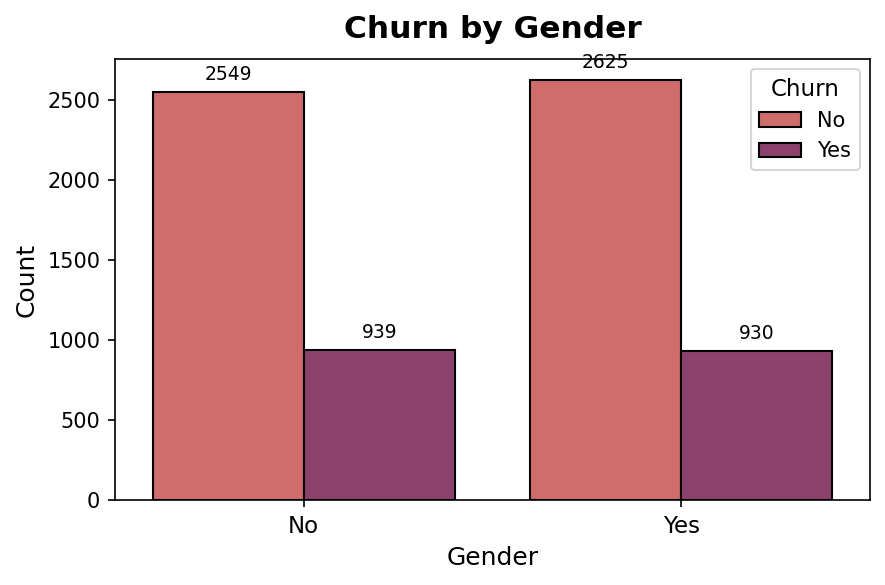

In [17]:
plt.figure(figsize=(6,4), dpi=150)

sns.countplot(
    data=df,
    x='gender',
    hue='Churn',
    palette="flare",
    edgecolor="black",
    linewidth=1,
    hue_order=['No', 'Yes']
)

plt.xticks([0,1], ['No', 'Yes'], fontsize=11)

for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:
        plt.text(
            p.get_x() + p.get_width()/2.,
            height + 50,
            f'{int(height)}',
            ha='center', va='bottom',
            fontsize=9
        )

plt.title("Churn by Gender", fontsize=15, weight="bold", pad=10)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.legend(title="Churn", fontsize=10, title_fontsize=11, loc="upper right", frameon=True)

plt.tight_layout()
plt.show()

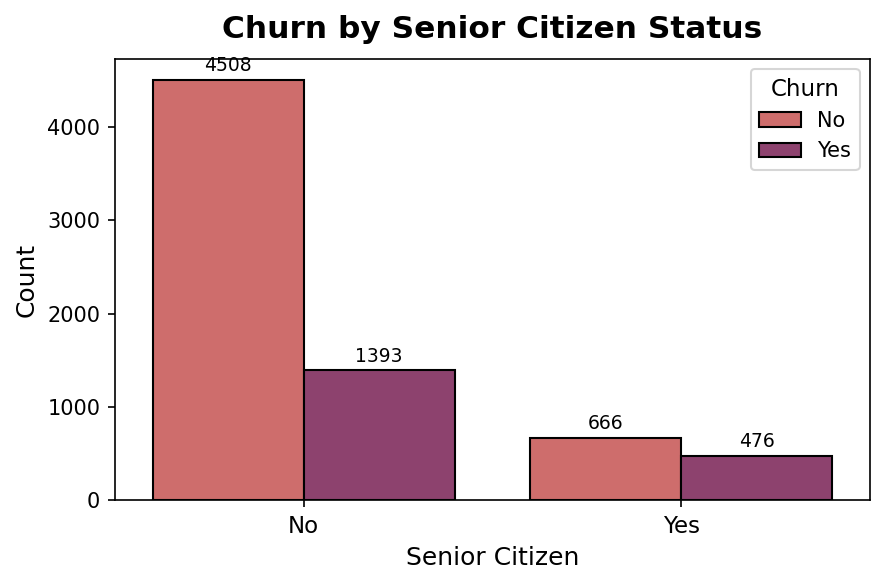

In [18]:
plt.figure(figsize=(6,4), dpi=150)

sns.countplot(
    data=df,
    x='SeniorCitizen',
    hue='Churn',
    palette="flare",
    edgecolor="black",
    linewidth=1,
    hue_order=['No', 'Yes']
)

plt.xticks([0,1], ['No', 'Yes'], fontsize=11)

for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:
        plt.text(
            p.get_x() + p.get_width()/2.,
            height + 50,
            f'{int(height)}',
            ha='center', va='bottom',
            fontsize=9
        )

plt.title("Churn by Senior Citizen Status", fontsize=15, weight="bold", pad=10)
plt.xlabel("Senior Citizen", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.legend(title="Churn", fontsize=10, title_fontsize=11, loc="upper right", frameon=True)

plt.tight_layout()
plt.show()

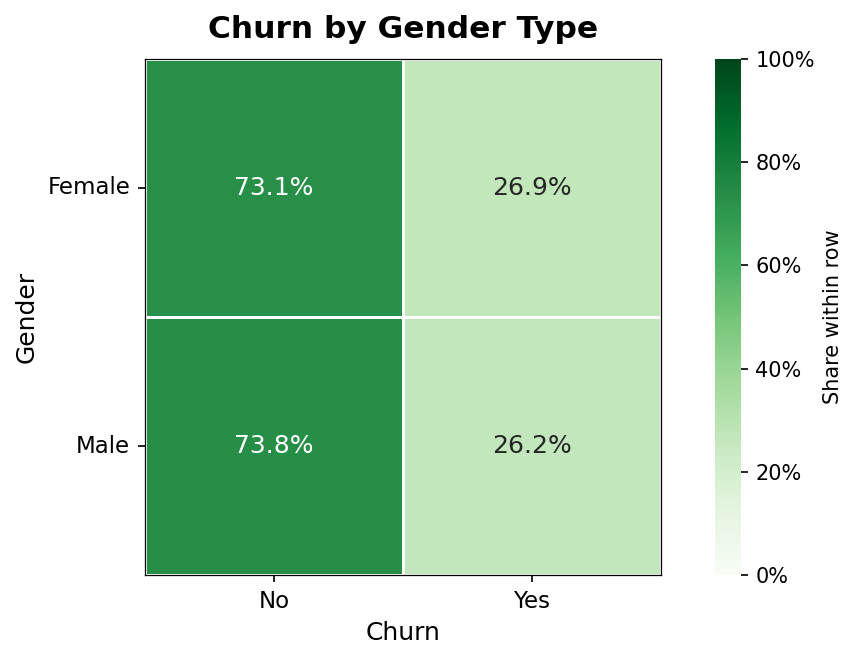

In [19]:
plot1 = (
    pd.crosstab(df['gender'], df['Churn'], normalize='index') * 100
).astype(float).round(1)

fig, ax = plt.subplots(figsize=(7.5, 4.5), dpi=150)

sns.heatmap(
    plot1,
    ax=ax,
    cmap="Greens",
    vmin=0, vmax=100,
    annot=True, fmt=".1f",
    annot_kws={"fontsize":12},
    linewidths=.6, linecolor="white",
    square=True,
    cbar_kws={"format":"%d%%", "label":"Share within row"}
)

for t in ax.texts:
    t.set_text(t.get_text() + "%")

ax.set_title("Churn by Gender Type", fontsize=15, weight="bold", pad=10)
ax.set_xlabel("Churn", fontsize=12)
ax.set_ylabel("Gender", fontsize=12)
ax.tick_params(labelsize=11)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.6)
plt.tight_layout()
plt.show()

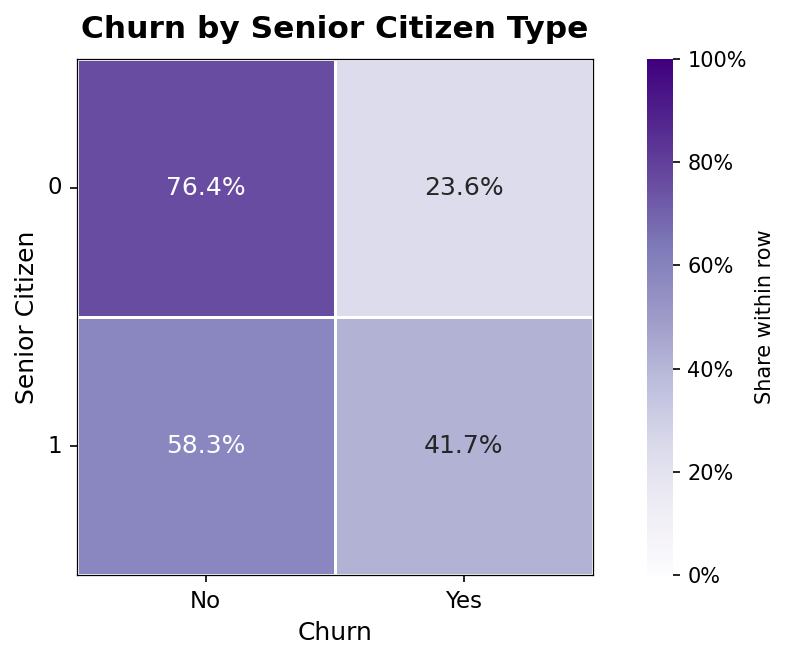

In [20]:
plot2 = (
    pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100
).astype(float).round(1)

fig, ax = plt.subplots(figsize=(7.5, 4.5), dpi=150)

sns.heatmap(
    plot2,
    ax=ax,
    cmap="Purples",
    vmin=0, vmax=100,
    annot=True, fmt=".1f",
    annot_kws={"fontsize":12},
    linewidths=.6, linecolor="white",
    square=True,
    cbar_kws={"format":"%d%%", "label":"Share within row"}
)

for t in ax.texts:
    t.set_text(t.get_text() + "%")

ax.set_title("Churn by Senior Citizen Type", fontsize=15, weight="bold", pad=10)
ax.set_xlabel("Churn", fontsize=12)
ax.set_ylabel("Senior Citizen", fontsize=12)
ax.tick_params(labelsize=11)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.6)
plt.tight_layout()
plt.show()

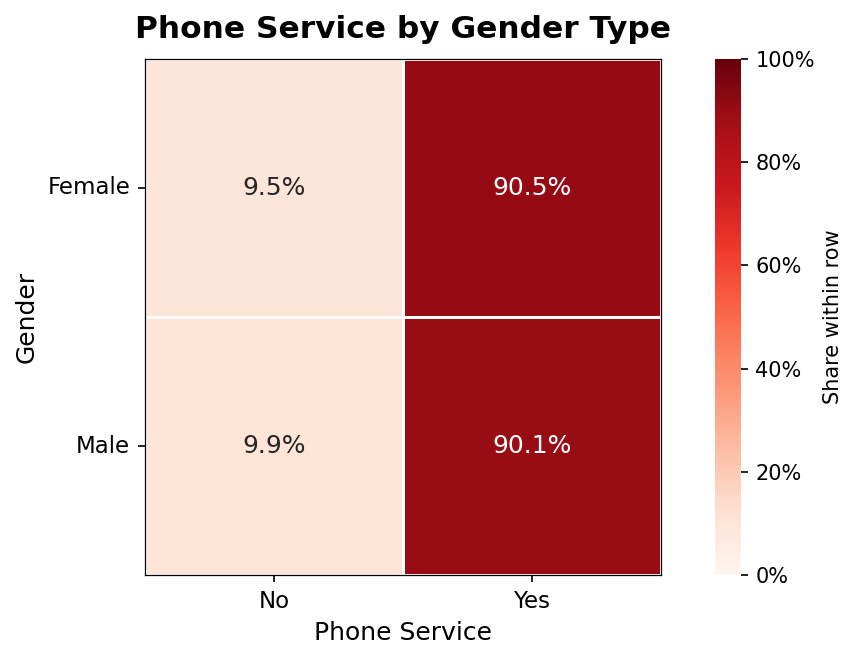

In [21]:
plot3 = (
    pd.crosstab(df['gender'], df['PhoneService'], normalize='index') * 100
).astype(float).round(1)

fig, ax = plt.subplots(figsize=(7.5, 4.5), dpi=150)

sns.heatmap(
    plot3,
    ax=ax,
    cmap="Reds",
    vmin=0, vmax=100,
    annot=True, fmt=".1f",
    annot_kws={"fontsize":12},
    linewidths=.6, linecolor="white",
    square=True,
    cbar_kws={"format":"%d%%", "label":"Share within row"}
)

for t in ax.texts:
    t.set_text(t.get_text() + "%")

ax.set_title("Phone Service by Gender Type", fontsize=15, weight="bold", pad=10)
ax.set_xlabel("Phone Service", fontsize=12)
ax.set_ylabel("Gender", fontsize=12)
ax.tick_params(labelsize=11)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.6)
plt.tight_layout()
plt.show()

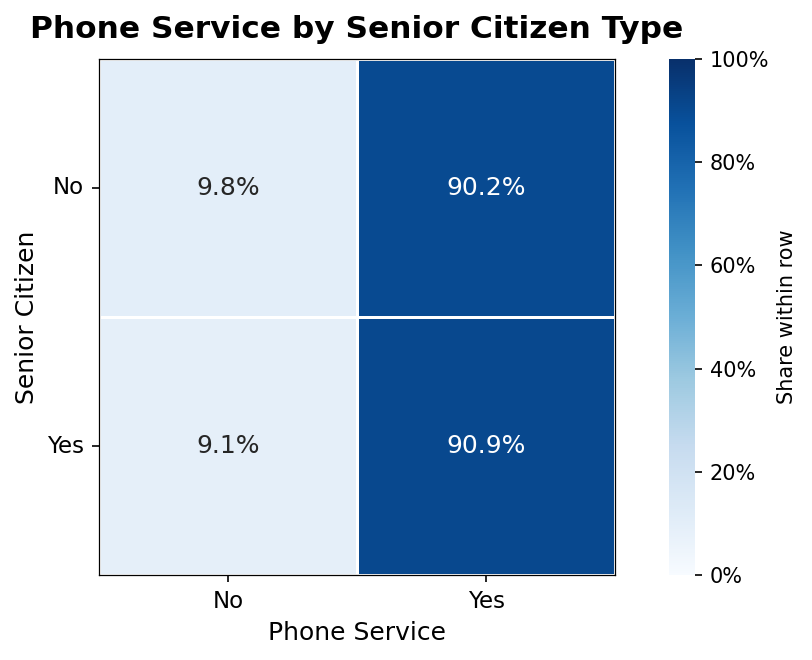

In [22]:
plot4 = (
    pd.crosstab(df['SeniorCitizen'], df['PhoneService'], normalize='index') * 100
).astype(float).round(1)

plot4.index = plot4.index.map({0: 'No', 1: 'Yes'})
plot4 = plot4.reindex(columns=['No', 'Yes'])

fig, ax = plt.subplots(figsize=(7.5, 4.5), dpi=150)

sns.heatmap(
    plot4,
    ax=ax,
    cmap="Blues",
    vmin=0, vmax=100,
    annot=True, fmt=".1f",
    annot_kws={"fontsize":12},
    linewidths=.6, linecolor="white",
    square=True,
    cbar_kws={"format":"%d%%", "label":"Share within row"}
)

for t in ax.texts:
    t.set_text(t.get_text() + "%")

ax.set_title("Phone Service by Senior Citizen Type", fontsize=15, weight="bold", pad=10)
ax.set_xlabel("Phone Service", fontsize=12)
ax.set_ylabel("Senior Citizen", fontsize=12)
ax.tick_params(labelsize=11)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.6)
plt.tight_layout()
plt.show()

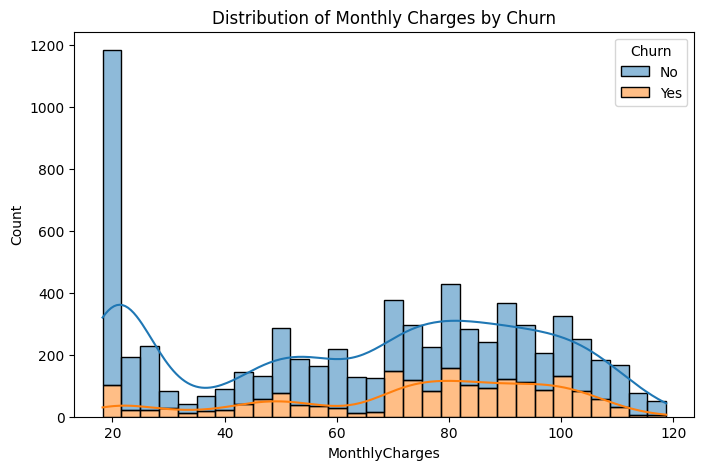

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='MonthlyCharges', kde=True, bins=30, hue='Churn', multiple='stack')
plt.title("Distribution of Monthly Charges by Churn")
plt.show()

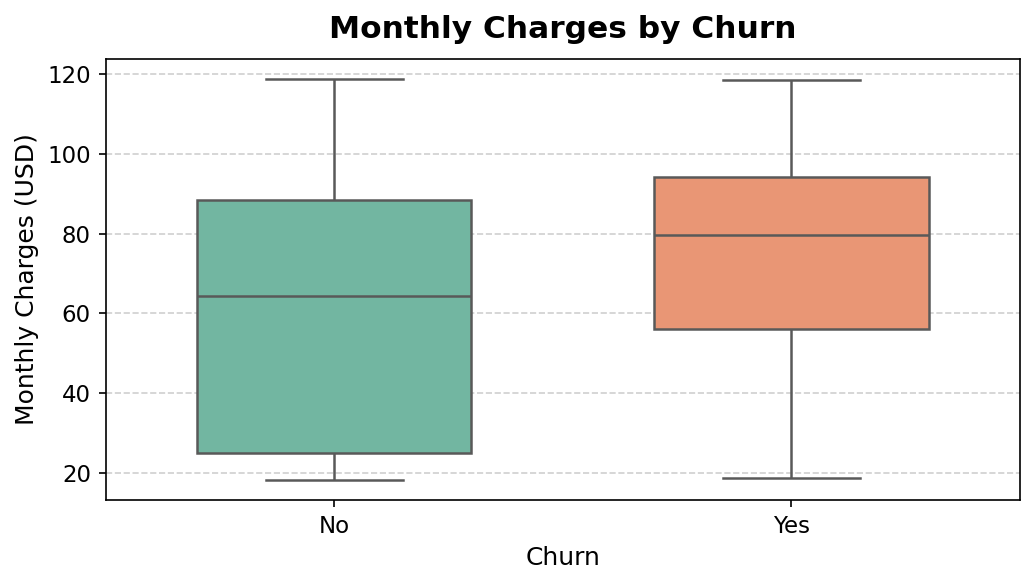

In [24]:
plt.figure(figsize=(7,4), dpi=150)

sns.boxplot(
    data=df,
    x='Churn',
    y='MonthlyCharges',
    hue='Churn',
    palette="Set2",
    width=0.6,
    linewidth=1.2,
    showfliers=False,
    dodge=False,
    legend=False
)
# Titles and labels
plt.title("Monthly Charges by Churn", fontsize=15, weight="bold", pad=10)
plt.xlabel("Churn", fontsize=12)
plt.ylabel("Monthly Charges (USD)", fontsize=12)

# Clean ticks
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Subtle grid for readability
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

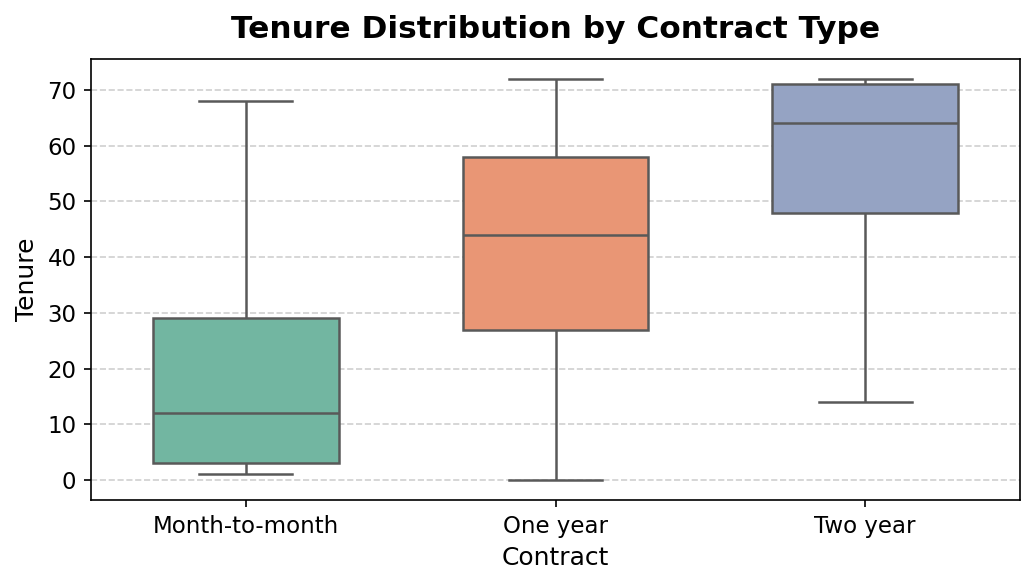

In [25]:
plt.figure(figsize=(7,4), dpi=150)

sns.boxplot(
    data=df,
    x='Contract',
    y='tenure',
    hue='Contract',
    palette="Set2",
    width=0.6,
    linewidth=1.2,
    showfliers=False,
    dodge=False,
    legend=False
)
# Titles and labels
plt.title("Tenure Distribution by Contract Type", fontsize=15, weight="bold", pad=10)
plt.xlabel("Contract", fontsize=12)
plt.ylabel("Tenure", fontsize=12)

# Clean ticks
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Subtle grid for readability
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

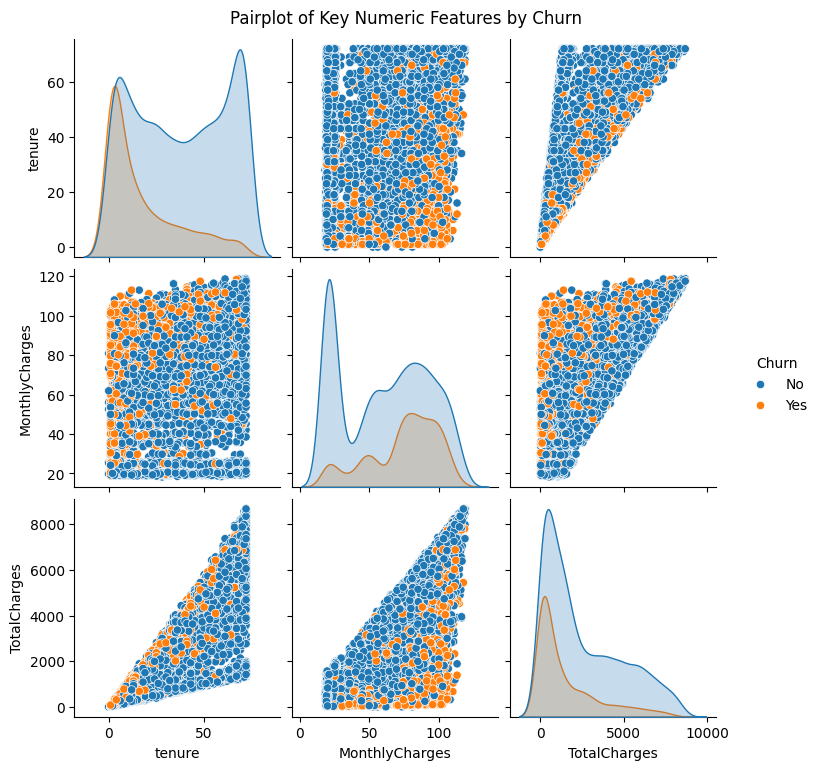

In [26]:
sns.pairplot(
    df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']],
    hue='Churn',
    diag_kind='kde'
)
plt.suptitle("Pairplot of Key Numeric Features by Churn", y=1.02)
plt.show()

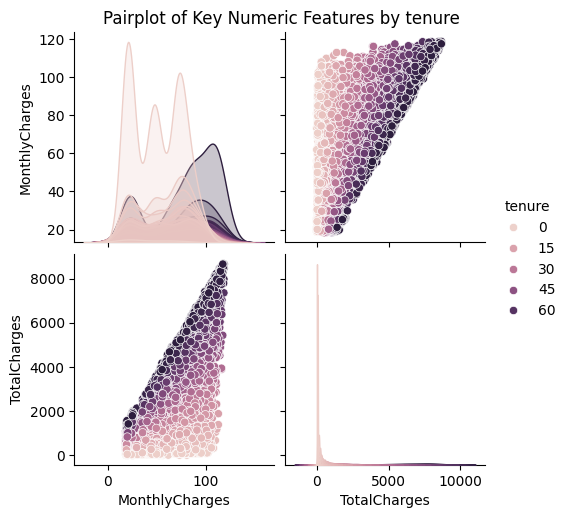

In [27]:
sns.pairplot(
    df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']],
    hue='tenure',
    diag_kind='kde'
)
plt.suptitle("Pairplot of Key Numeric Features by tenure", y=1.02)
plt.show()

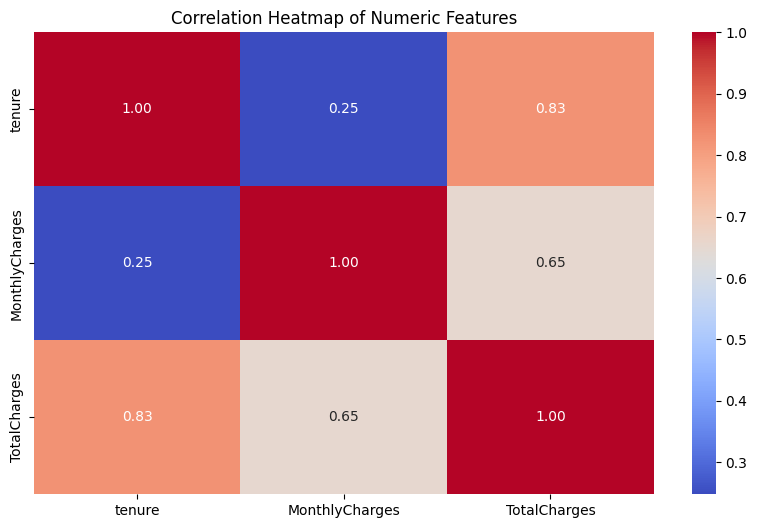

In [28]:
plt.figure(figsize=(10,6))
corr = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

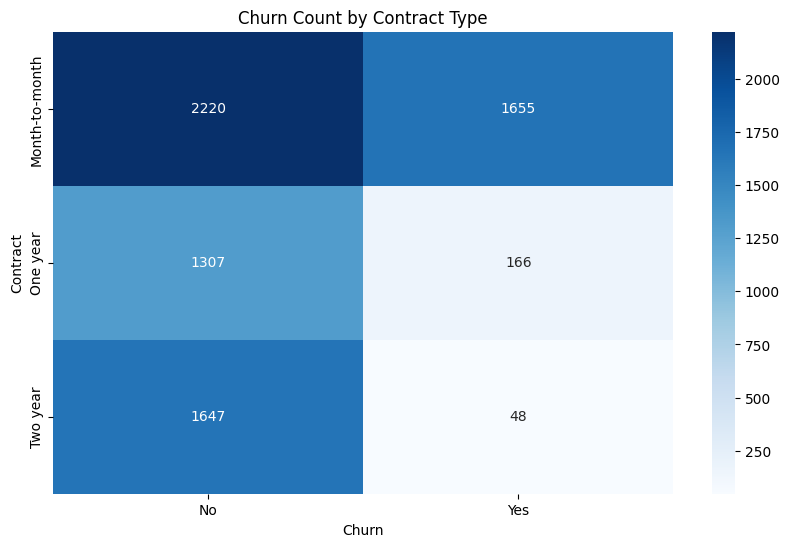

In [29]:
plot5 = pd.crosstab(df['Contract'], df['Churn'])

plt.figure(figsize=(10,6))
sns.heatmap(plot5, annot=True, cmap="Blues", fmt="d")
plt.title("Churn Count by Contract Type")
plt.show()